In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

In [4]:
#
allDirs = os.listdir("./experiments")

In [5]:
# Creating a list of file paths to the result files (.csv format)
areFiles = [os.path.join(os.path.abspath(os.path.curdir),os.path.join("experiments",f)) for f in allDirs if (os.path.isfile(os.path.join(os.path.abspath(os.path.curdir),os.path.join("experiments",f))) == True)]
fNames = [f.split("\\")[-1] for f in areFiles]
print(areFiles)

['c:\\Users\\paulw\\OneDrive - Scientific Network South Tyrol\\STL Experiments\\experiments\\resultsAbsence1.csv', 'c:\\Users\\paulw\\OneDrive - Scientific Network South Tyrol\\STL Experiments\\experiments\\resultsAbsence2.csv', 'c:\\Users\\paulw\\OneDrive - Scientific Network South Tyrol\\STL Experiments\\experiments\\resultsAbsence3.csv', 'c:\\Users\\paulw\\OneDrive - Scientific Network South Tyrol\\STL Experiments\\experiments\\resultsResponse1.csv', 'c:\\Users\\paulw\\OneDrive - Scientific Network South Tyrol\\STL Experiments\\experiments\\resultsResponse2.csv', 'c:\\Users\\paulw\\OneDrive - Scientific Network South Tyrol\\STL Experiments\\experiments\\resultsResponse3.csv']


In [12]:
head = ["runs", "avgTime", "std", "nTrials", "nObs", "timePerObs"]

runData = []

for f in areFiles:
    fname = f.split("\\")[-1]
    d = pd.read_csv(f, sep=";", header=None, names=head)
    r= d.groupby("nObs").agg({"runs":"sum"})

    for k in range(len(r)):
        r0 = r.iloc[k].str.replace(r"[", " ").str.replace(r"]"," ")
        r0Arr = r0.str.strip().str.split(" ").iloc[0]
        r0Runs = np.array([item for item in r0Arr if item]).astype(float)
        [runData.append([fname, r0.name, rItem]) for rItem in r0Runs]

In [13]:
dfPlot = pd.DataFrame(runData, columns=["FileName", "nObs", "runTime"])
dfPlot["logTime"] = np.log(dfPlot["runTime"])

In [ ]:
interData_ = dfPlot.groupby(["FileName", "nObs"]).agg({"runTime":"mean"}).reset_index()
interData_["timePerObs"] = interData_["runTime"]/interData_["nObs"]

c:\Users\paulw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\paulw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\paulw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\paulw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

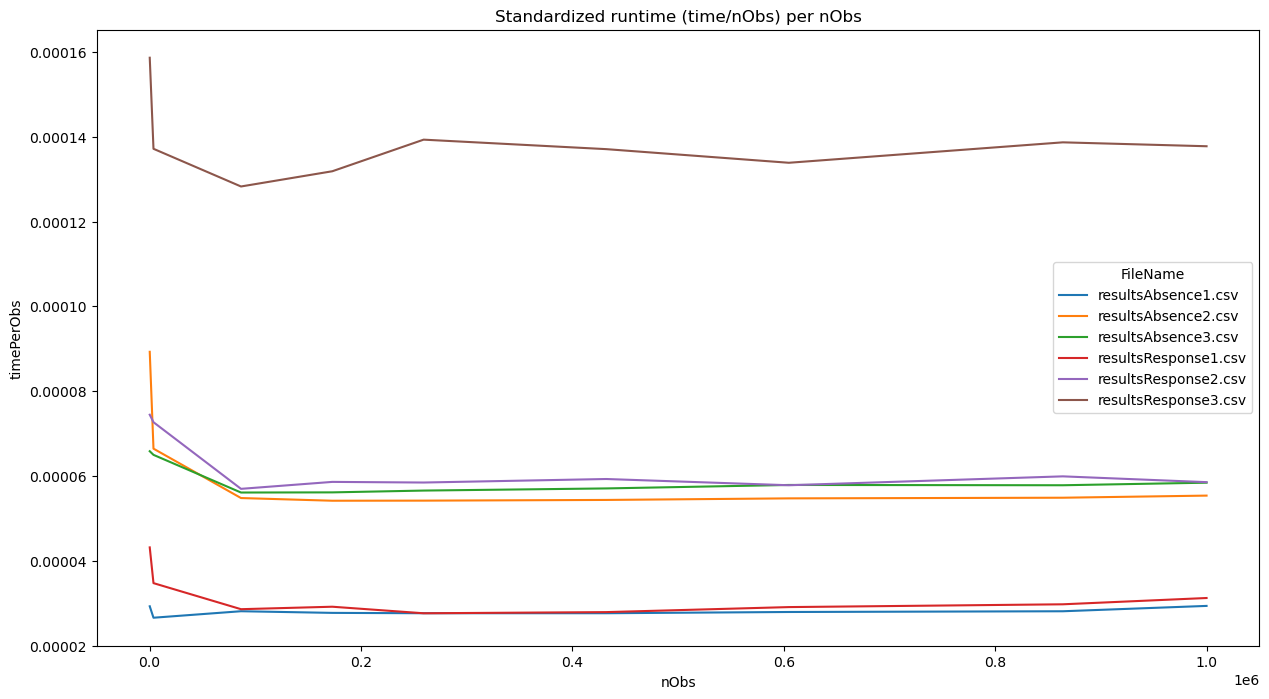

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=interData_, x="nObs", y="timePerObs", hue="FileName")
plt.title("Standardized runtime (time/nObs) per nObs")
plt.savefig("./runTimePerformance.png")

In [26]:
#formulas = [
#    "Absence[0,m](x[t] >=)",
#    "Response[0,m](x[t]>1000, x[t]<400)",
#    "Response[0,m][0,1](g[t]>500, dist(d[t]))",
#    "Response[0,m][]"
#]

"""
formulas = [
    "Absence(x[t]>1000)",
    "Absence(x[t]>1000)  ∧ \nAbsence(x[t]<150)",
    "Absence(x[t]>1000) ∧ \nAbsence(x[t]<150) ∧ \nAbsence(t[t]>40)",
    "Response(x[t]>1000, x[t]<400)",
    "Response(g[t]>500, dist(d[t]))",
    "Response(h[t]<40, G(x[t]<300))"
]
"""
formulas = [
    "Absence Test 1",
    "Absence Test 2",
    "Absence Test 3", 
    "Response Test 1",
    "Response Test 2", 
    "Response Test 3"
]

<Figure size 1500x800 with 0 Axes>

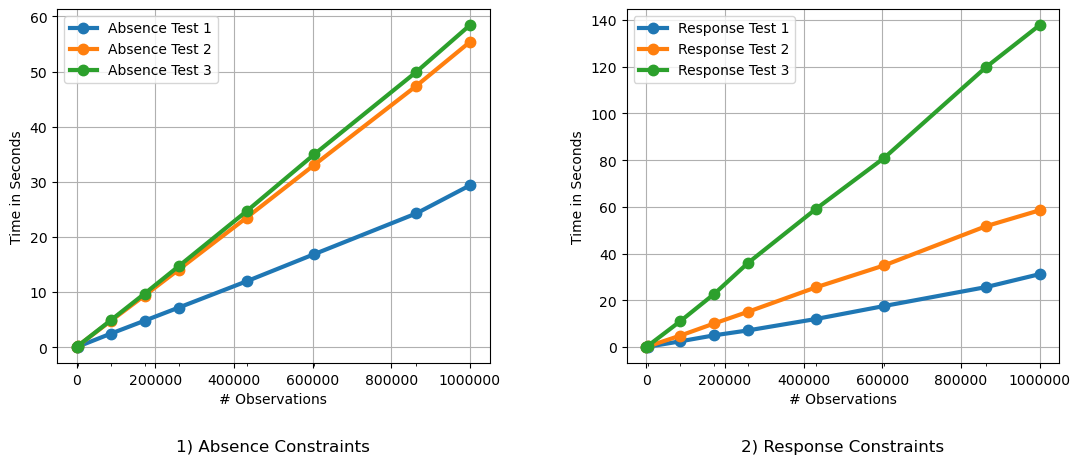

In [ ]:
plt.figure(figsize=(15,8))

fig, axs_ = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)

plotTitles = [
    "Absence Constraints",
    "Response Constraints"
]

for i in range(2):
    axleg = []
    for j in range(3):
        axleg.append(f"{formulas[(j+i*3)]}")
        d = pd.read_csv(areFiles[(j+i*3)], sep=";", header=None, names=head)
        axs_[i].plot(d.loc[:,["nObs", "avgTime"]].groupby(by="nObs").mean().sort_values(by="nObs").index.values, d.loc[:,["nObs", "avgTime"]].groupby(by="nObs").mean().sort_values(by="nObs").values, marker=".", markersize=15, linewidth=3)
        axs_[i].set_ylabel("Time in Seconds")
        axs_[i].grid(True)
        axs_[i].set_xlabel("# Observations")
        #axs_[i].set_title(f"{1+j+i*3}) {fNames[(j+i*3)]}", y=-.15, pad=-25)
        axs_[i].set_title(f"{i+1}) {plotTitles[i]}", y=-.15, pad=-25)
        axs_[i].xaxis.set_minor_locator(FixedLocator([60, 60*60, 60*60*24, 60*60*24*2, 60*60*24*3, 60*60*24*5, 60*60*24*7, 60*60*24*10, 10**6]))
        axs_[i].ticklabel_format(style="plain")
        axs_[i].legend(axleg)
        #axs_[i,j].set_xticks(list(axs_[i,j].get_xticks()), rotation=45)
        #axs_[i,j].set_xticklabels(axs_[i,j].get_xticklabels(),rotation=45)


fig.tight_layout(pad=5)
#fig.title("Responses")
plt.savefig("./performance.png", dpi=600)


In [30]:
dfPlot.groupby("FileName").count()

,nObs,runTime,logTime
FileName,,,
resultsAbsence1.csv,135,135,135
resultsAbsence2.csv,135,135,135
resultsAbsence3.csv,135,135,135
resultsResponse1.csv,135,135,135
resultsResponse2.csv,135,135,135
resultsResponse3.csv,135,135,135


In [10]:
import scipy as sp
print(sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence1.csv"]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == "resultsResponse1.csv"]["runTime"])))
print(sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence2.csv"]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence3.csv"]["runTime"])))
print(sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence3.csv"]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence2.csv"]["runTime"])))
print(sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == "resultsResponse2.csv"]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence3.csv"]["runTime"])))
print(sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == "resultsResponse2.csv"]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence2.csv"]["runTime"])))

NameError: name 'dfPlot' is not defined

In [22]:
sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == "resultsResponse2.csv"]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == "resultsAbsence2.csv"]["runTime"]))[1]

0.37632346584149867

In [28]:
for i in range(len(fNames)):
    for j in range(len(fNames)-i):
            if j==0: continue
            print(fNames[i], fNames[i+j], sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == fNames[i]]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == fNames[i+j]]["runTime"]))[1])
            pval = sp.stats.ks_2samp(np.array(dfPlot[dfPlot["FileName"] == fNames[i]]["runTime"]), np.array(dfPlot[dfPlot["FileName"] == fNames[i+j]]["runTime"]))[1]
            with open("./resultsPvalues.txt", "a") as f:
                  f.write(f"{fNames[i]}; {fNames[i+j]}; {pval}\n")

resultsAbsence1.csv resultsAbsence2.csv 1.8667075282598969e-06
resultsAbsence1.csv resultsAbsence3.csv 1.8667075282598969e-06
resultsAbsence1.csv resultsResponse1.csv 0.4636906691856864
resultsAbsence1.csv resultsResponse2.csv 9.594250983235224e-07
resultsAbsence1.csv resultsResponse3.csv 1.9079797862918684e-18
resultsAbsence2.csv resultsAbsence3.csv 0.9265781450735707
resultsAbsence2.csv resultsResponse1.csv 1.2463723560575939e-05
resultsAbsence2.csv resultsResponse2.csv 0.37632346584149867
resultsAbsence2.csv resultsResponse3.csv 2.0896310886944482e-10
resultsAbsence3.csv resultsResponse1.csv 1.2463723560575939e-05
resultsAbsence3.csv resultsResponse2.csv 0.9265781450735707
resultsAbsence3.csv resultsResponse3.csv 1.2465860156951955e-08
resultsResponse1.csv resultsResponse2.csv 6.727578058265421e-06
resultsResponse1.csv resultsResponse3.csv 6.45714873389348e-17
resultsResponse2.csv resultsResponse3.csv 5.696764050219979e-09
